In [ ]:
import os
import re
import seaborn as sb
import tensorflow
import pandas as pd
import numpy
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6
import matplotlib.pyplot as plt
import time
#import statsmodels
#from statsmodels.tsa.stattools import adfuller
#import statsmodels.api as sm
import scipy
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam, SGD
import keras.callbacks as callbacks
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

In [4]:
from evaluation import load_dataset
from evaluation import preproc
from evaluation import eigen_plot
from evaluation import dimension_reduction
from evaluation import plot_3d
from evaluation import projection_plot
from evaluation import corr_matrix_plot
from evaluation import plot_boxplot

In [10]:
dataset='/home/caducovas/mc16a.zee.20M.jf17.20M.offline.binned.calo.wdatadrivenlh_etBin_2_etaBin_0.npz_2_0.npz'

In [5]:
data = np.load('/home/caducovas/mc16a.zee.20M.jf17.20M.offline.binned.calo.wdatadrivenlh_etBin_2_etaBin_0.npz_2_0.npz')

In [9]:
data['signalPatterns_etBin_2_etaBin_0'].shape,data['backgroundPatterns_etBin_2_etaBin_0'].shape

((1245005, 100), (63981, 100))

In [9]:
float(data['backgroundPatterns_etBin_2_etaBin_0'].shape[1])/float(data['signalPatterns_etBin_2_etaBin_0'].shape[0])

8.03209625664154e-05

In [12]:
dataDf, labels = load_dataset(dataset, fracPos=0.02, fracNeg=0.002)
dataDf = preproc(dataDf, verbose=False)


Data loaded with following class distribution: 
Positive class: 0.00 %, 1280 entries 
Negative class: 0.00 %, 2490 entries 

3 features containing only zeros have been dropped from data.


In [21]:
## Principal Components Analysis
# useful to reduce dataset dimensionality
compactDf = dimension_reduction(dataDf, keepComp=0)



('\nN components:', 97)
('\nPrincipal components to keep: ', 97)
('\nCompact data: ', (3770, 97))


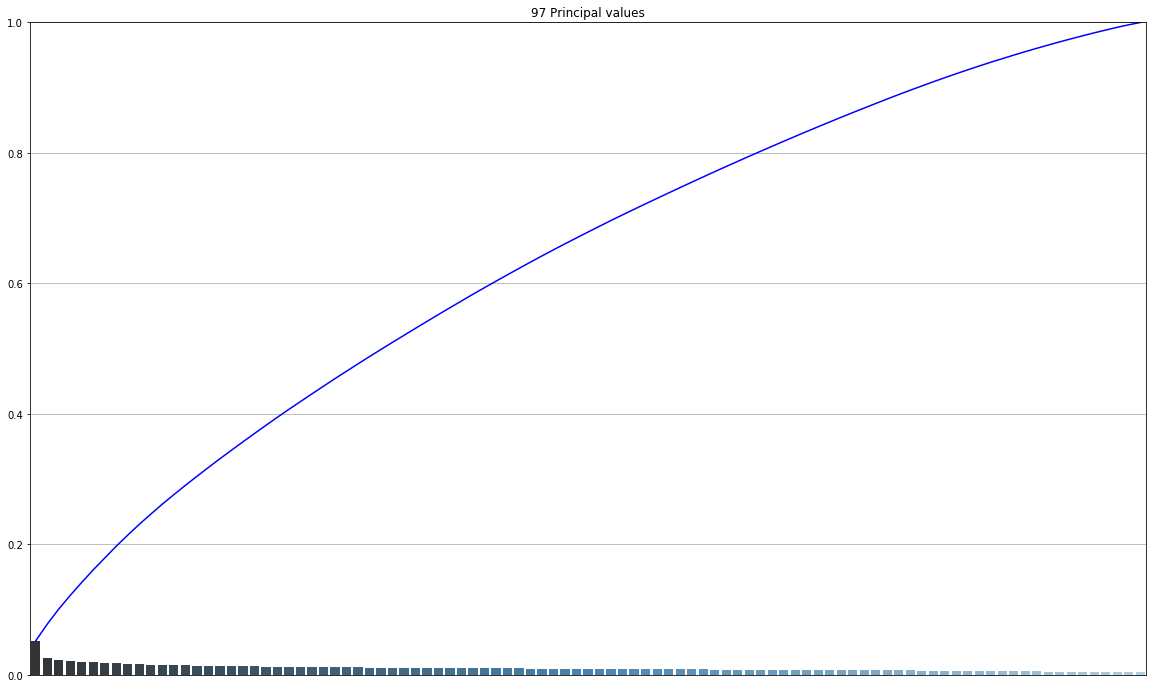

In [29]:
# Plot Principal Components contributions
fig, ax1 = plt.subplots(figsize=(20, 12))
plt.grid()
eigen_plot(dataDf, labels)


3D Scatter plot


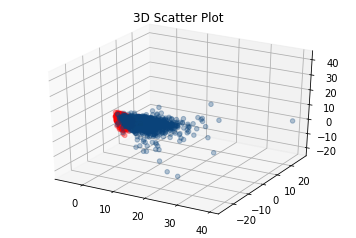

(<matplotlib.figure.Figure at 0x955b0d0>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x29f26bd0>)

In [28]:
## Plot 3D data
print("\n3D Scatter plot")
plot_3d(compactDf.iloc[:, :3], labels)


Pair Projection plot


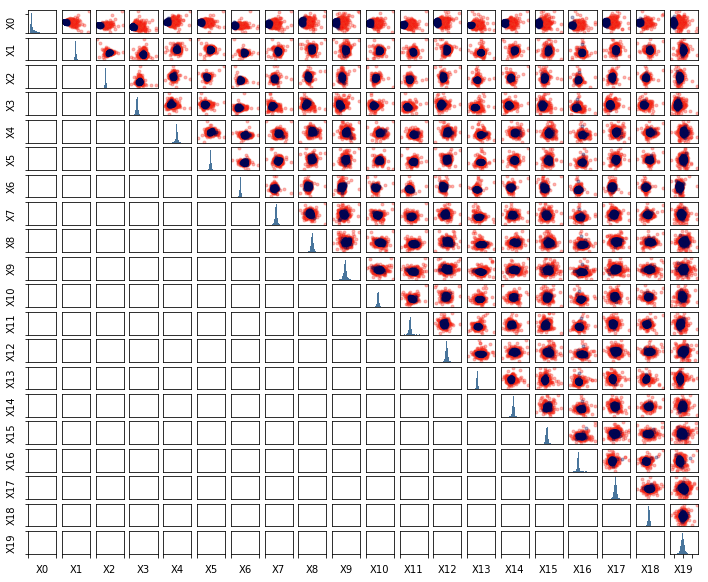

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x269ca250>,
         <matplotlib.axes._subplots.AxesSubplot object at 0xb6b6c50>]], dtype=object),
 <matplotlib.figure.Figure at 0x26120b50>)

In [17]:
## Custom pair plot
print("\nPair Projection plot")
projection_plot(compactDf.iloc[:,:20], labels)


Correlation matrix plot


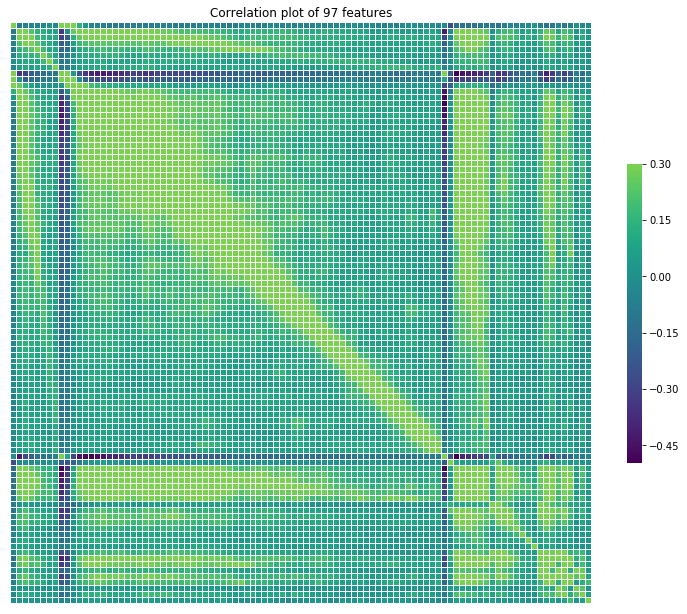

(<matplotlib.figure.Figure at 0x26967f50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d7aa9d0>)

In [18]:
# ## Correlation matrix plot
print("\nCorrelation matrix plot")
corr_matrix_plot(dataDf)


Boxplot


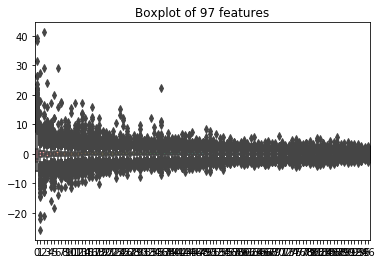

In [19]:
## Boxplot
print("\nBoxplot")
plot_boxplot(compactDf.iloc[:, :], labels)